In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('darkgrid')

from ipywidgets import *
from IPython.display import display

%config InlineBackend.figure_format = 'retina'
%matplotlib inline


In [2]:
def generate_gaussian_sample(n, mean, std):
    return np.random.normal(mean, std, size=n)

def generate_multiple_sample_means(n, m, s, random_samples):
    return np.array([np.mean(generate_gaussian_sample(n, m, s)) for i in range(random_samples)])
    
def generate_t_sample(n, m, s, df):
    return stats.t.rvs(df, loc=m, scale=s, size=n)

In [3]:
def tstat_visualization(n, mean1, mean2, std1, std2):
        
    sample1_means = generate_multiple_sample_means(n, mean1, std1, 5000)
    sample2_means = generate_multiple_sample_means(n, mean2, std2, 5000)
    
    mean_diffs = sample1_means - sample2_means
    mean_difference = np.mean(sample1_means) - np.mean(sample2_means)
    
    std_err_mean = np.sqrt((std1**2/n) + (std2**2/n))

    df = n-1
    
    #diff_std = np.sqrt((std1**2/n1) + (std2**2/n2))
    null_distribution = generate_t_sample(5000, 0, std_err_mean, df)
    
    t_stat = mean_difference / std_err_mean
    p_val = stats.t.sf(np.abs(t_stat), df)*2
    
    print 't-statistic:', t_stat
    print 'p-value:', p_val
        
    fig, axarr = plt.subplots(2, 2, figsize=(15, 13), sharex=False, sharey=False)
    
    xmin = np.min([mean1-(std1*4), mean2-(std2*4)])
    xmax = np.max([mean1+(std1*4), mean2+(std2*4)])
    xpoints = np.linspace(xmin, xmax, 500)
    
    # use stats.t.pdf to get values on the probability density function for the t-distribution
    ypoints_s1 = stats.norm.pdf(xpoints, mean1, std1)
    ypoints_s2 = stats.norm.pdf(xpoints, mean2, std2)
    
    axarr[0,0].set_title('True distributions of samples\n', fontsize=16)
    axarr[0,0].plot(xpoints, ypoints_s1, linewidth=3, color='darkred', label='sample 1 true dist')
    axarr[0,0].plot(xpoints, ypoints_s2, linewidth=3, color='steelblue', label='sample 2 true dist')
    
    samp1 = generate_gaussian_sample(n, mean1, std1)
    samp2 = generate_gaussian_sample(n, mean2, std2)
    
    axarr[0,1].set_title('Drawn samples\n', fontsize=16)
    axarr[0,1].hist(samp1, np.minimum(20, n), 
                    normed=False, facecolor='darkred', alpha=0.3, label='sample 1')
    axarr[0,1].hist(samp2, np.minimum(20, n), 
                    normed=False, facecolor='steelblue', alpha=0.3, label='sample 2')
    
    axarr[1,0].set_title('H0 & H1 t-distributions (5000 n-size samples mean diffs.)\n', fontsize=16)
    axarr[1,0].hist(null_distribution, 60, normed=True, facecolor='grey', 
                    alpha=0.3)
    axarr[1,0].hist(mean_diffs, 60, normed=True, facecolor='gold', 
                    alpha=0.3)
    
    xmin, xmax = axarr[1,0].get_xlim()
    xpoints = np.linspace(xmin, xmax, 500)
    
    # use stats.t.pdf to get values on the probability density function for the t-distribution
    ypoints_null = stats.norm.pdf(xpoints, 0, std_err_mean)
    ypoints_exp = stats.norm.pdf(xpoints, np.mean(mean_diffs), np.std(mean_diffs))
    
    axarr[1,0].plot(xpoints, ypoints_null, linewidth=3, color='grey', 
                    label='H0 t-distribution')
    axarr[1,0].plot(xpoints, ypoints_exp, linewidth=3, color='gold', 
                    label='H1 t-distribution')
    
    # generate points on the x axis between -4 and 4:
    xpoints = np.linspace(np.minimum(-4, t_stat), np.maximum(4, t_stat), 500)

    # use stats.t.pdf to get values on the probability density function for the t-distribution
    ypoints = stats.t.pdf(xpoints, df, 0, 1)
    
    # plot the lines using matplotlib's plot function:
    axarr[1,1].set_title('Null (H0) t-distribution and alternative t-statistic\n', fontsize=16)
    axarr[1,1].plot(xpoints, ypoints, linewidth=3, color='grey', label='H0 t-distribution')
    
    # plot a vertical line for our measured difference in rates t-statistic
    axarr[1,1].axvline(t_stat, color='gold', lw=5, label='H1 t-statistic')
    
    axarr[0,0].legend(loc='upper right')
    axarr[0,1].legend(loc='upper right')
    axarr[1,0].legend(loc='upper right')
    axarr[1,1].legend(loc='upper right')
    
    plt.show()
    

In [4]:

def plot_delegator(samples_n,
                   sample1_mean, sample2_mean, 
                   sample1_std, sample2_std):
    
    tstat_visualization(samples_n,
                        sample1_mean, sample2_mean, 
                        sample1_std, sample2_std)
    

t-statistic: 1.48982884727
p-value: 0.170454800476


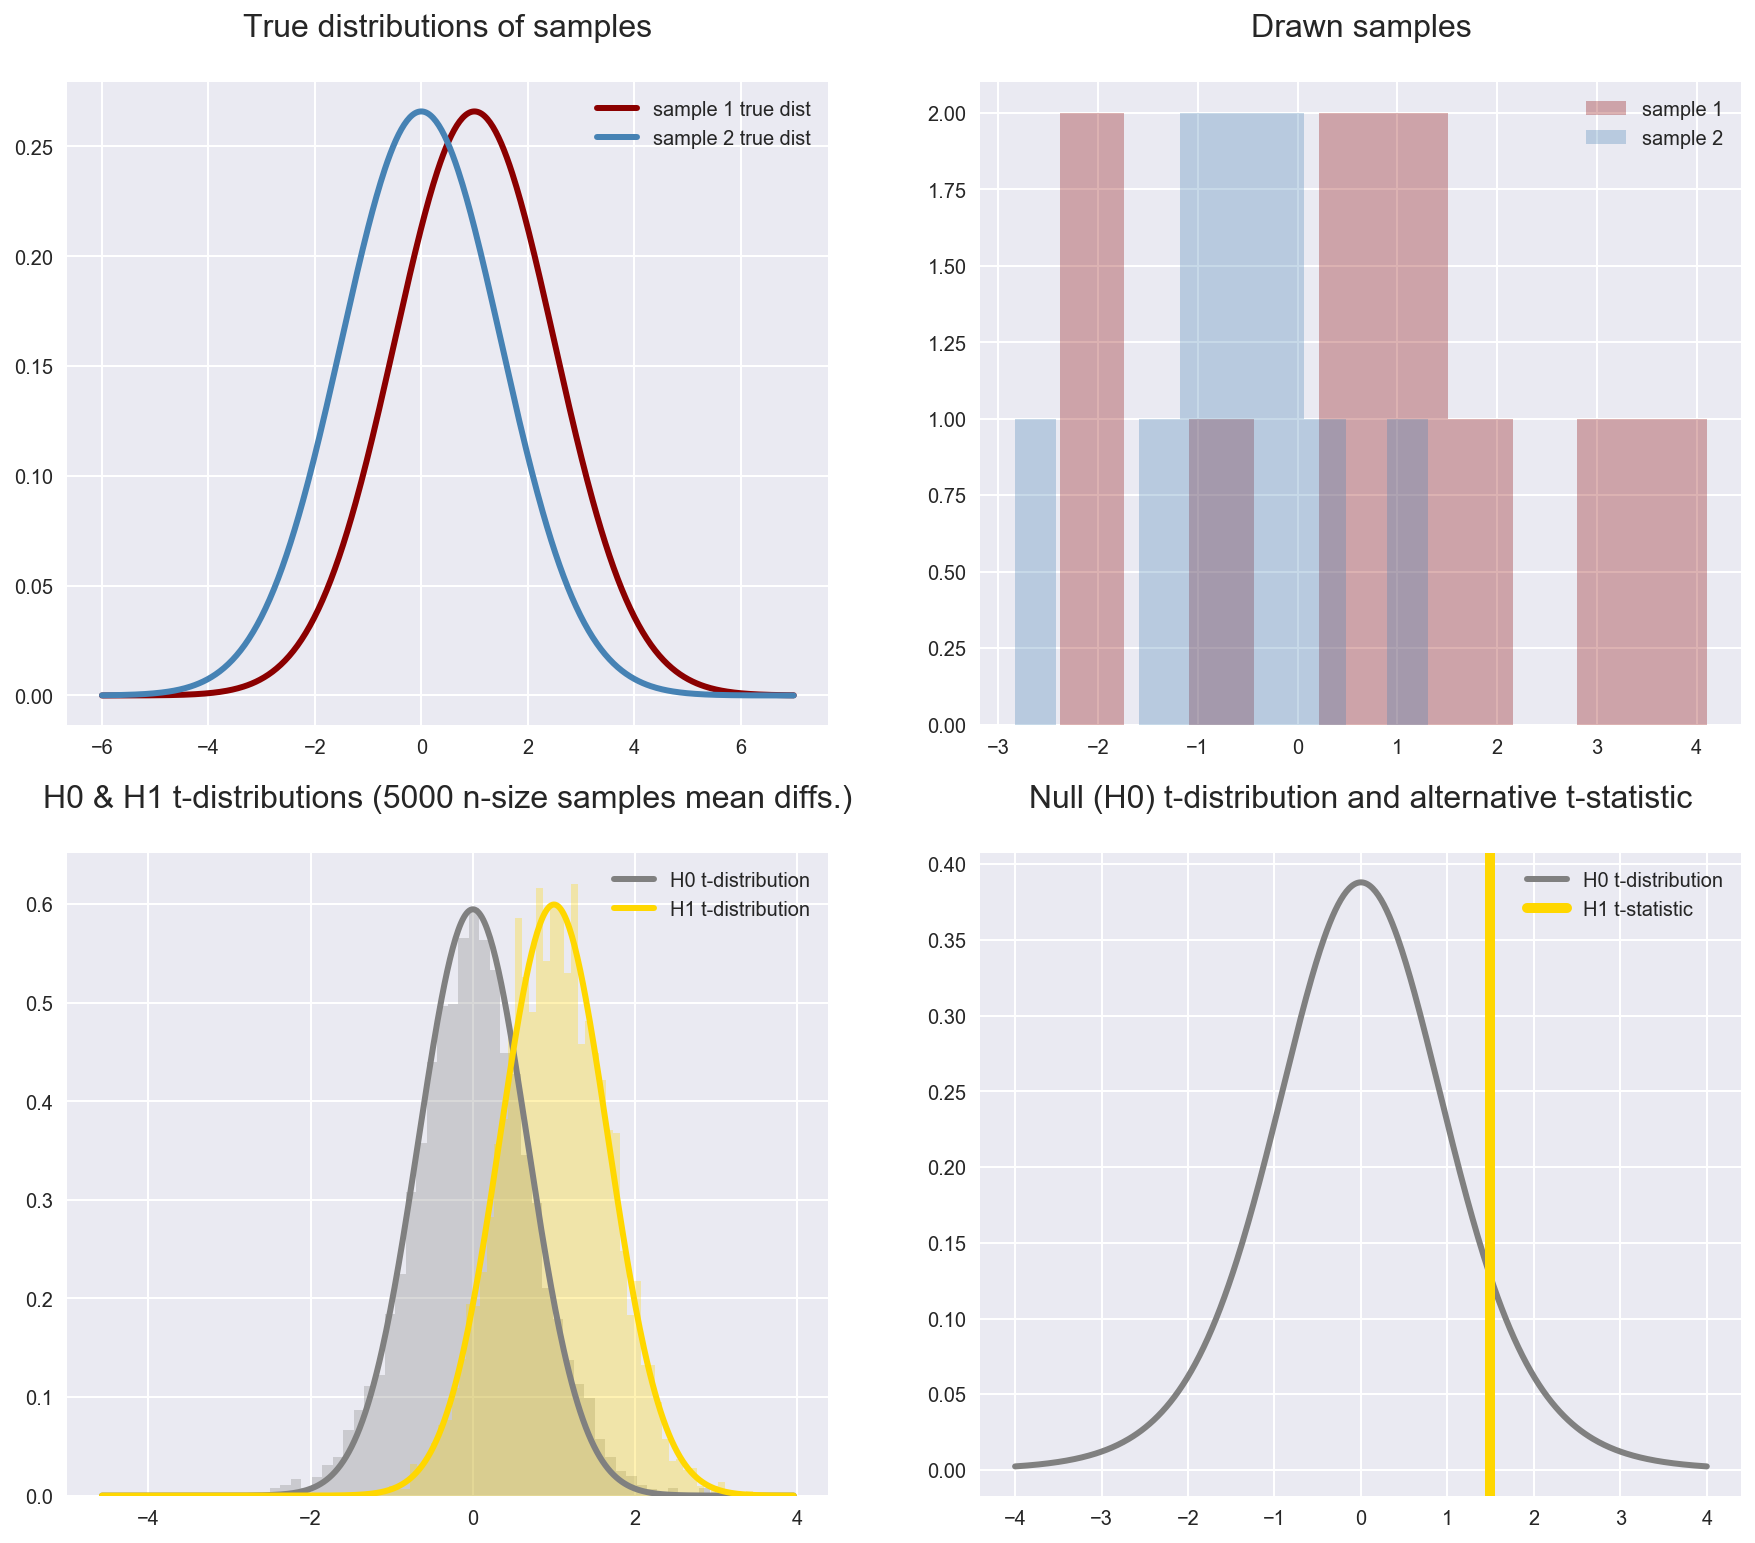

<function __main__.plot_delegator>

In [5]:
interact(plot_delegator, 
         samples_n=widgets.IntSlider(min=3, max=100, step=1, value=10, continuous_update=False),
         sample1_mean=widgets.FloatSlider(min=-10, max=10, step=0.25, value=1, continuous_update=False),
         sample2_mean=widgets.FloatSlider(min=-10, max=10, step=0.25, value=0, continuous_update=False),
         sample1_std=widgets.FloatSlider(min=0.25, max=5.0, step=0.25, value=1.5, continuous_update=False),
         sample2_std=widgets.FloatSlider(min=0.25, max=5.0, step=0.25, value=1.5, continuous_update=False))
       